# TBmodels

## Setup

In [1]:
%%capture
%%bash
pip install tbmodels

In [2]:
import tbmodels

## Load model from Wannier90 output

In [3]:
tbmodels.Model.from_wannier_folder?

In [4]:
tbmodels.Model.from_wannier_files?

In [5]:
model = tbmodels.Model.from_wannier_folder(folder='wannier_output', prefix='wannier90', pos_kind='nearest_atom')

The model can be used to directly evaluate the Hamiltonian or bandstructure at a given k-point (in reduced coordinates):

In [6]:
model.hamilton((0.1, 0.2, 0.3))

array([[ 5.92456176e+00+0.00000000e+00j, -1.26761836e+00-7.09414102e-01j,
        -6.54638279e-01-3.67497646e-01j, -8.26511544e-02-4.92022704e-01j,
         4.20711355e-01+2.38671279e+00j, -2.53722386e+00-7.87317936e-01j,
        -2.22023247e+00-9.38232311e-01j, -2.72879663e+00-1.55198157e+00j,
        -5.10916029e-05+1.29059858e-04j, -6.00034669e-03-4.13196081e-04j,
         1.29446760e-03+6.04194277e-03j,  4.94313517e-03-7.32471539e-03j,
         2.38228083e-04-1.11908892e-03j,  9.76643906e-04-2.27488476e-03j,
        -2.24219473e-03-7.85002436e-04j,  1.52394645e-03+1.93713830e-03j],
       [-1.26761836e+00+7.09414102e-01j,  6.26494753e+00+0.00000000e+00j,
        -1.36063905e+00+7.84800890e-02j, -6.53546182e-01-3.55089964e-01j,
        -1.49932682e+00+1.87590249e+00j,  6.26531167e-01+6.39154631e-01j,
        -1.68809457e+00+1.10180612e+00j, -2.43466978e+00+8.15650031e-01j,
         5.71053578e-03+7.55084222e-04j,  6.48144064e-05-6.97060777e-04j,
        -6.36958175e-03-6.93415728e-0

In [7]:
model.eigenval((0.1, 0.2, 0.3))

array([-4.90055122, -4.90051734,  2.86117931,  2.86119381,  4.16114406,
        4.16118969,  5.26824909,  5.26826944,  8.61673588,  8.61677532,
       10.03240428, 10.03241773, 11.01613782, 11.01614393, 11.70372198,
       11.70375832])

### Plot bandstructure with bands-inspect

In [8]:
%%capture
%%bash
pip install bands-inspect

In [9]:
import bands_inspect as bi

In [10]:
kpts_path = bi.kpoints.KpointsPath(
    paths=[[r'$\Gamma$', 'X', 'U'], ['K', r'$\Gamma$', 'L', 'W', 'X']],
    special_points={
        r'$\Gamma$': (0, 0, 0),
        'X': (0.5, 0, 0.5),
        'U': (0.625, 0.25, 0.625),
        'K': (0.375, 0.375, 0.75),
        'L': (0.5, 0.5, 0.5),
        'W': (0.5, 0.25, 0.75),
    },
    unit_cell=model.uc,
    kpoint_distance=0.01)

In [11]:
eigenvals = bi.eigenvals.EigenvalsData.from_eigenval_function(
    kpoints=kpts_path,
    eigenval_function=model.eigenval
)

<IPython.core.display.Javascript object>


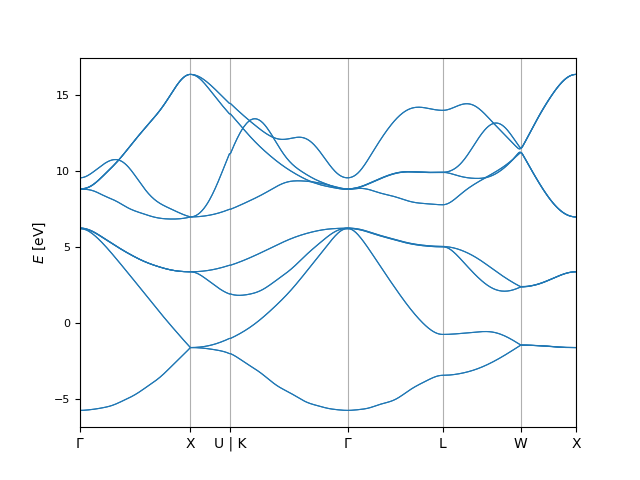

In [25]:
%matplotlib notebook
bi.plot.eigenvals(eigenvals);

## Symmetrization

In [13]:
import symmetry_representation as sr

In [14]:
symmetry_group = sr.io.load('symmetries.hdf5')

/home/greschd/.virtualenvs/tools_intro/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [15]:
model_symm = model.symmetrize(symmetry_group.symmetries, full_group=symmetry_group.full_group)

### Comparison of band structures

In [16]:
eigenvals_symm = bi.eigenvals.EigenvalsData.from_eigenval_function(
    kpoints=kpts_path,
    eigenval_function=model_symm.eigenval
)

<IPython.core.display.Javascript object>


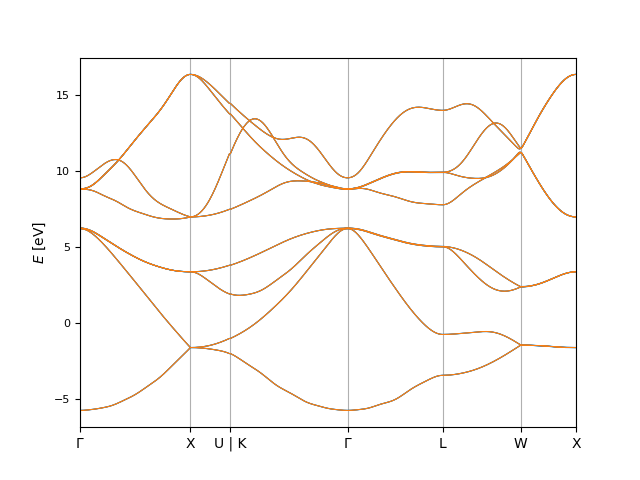

In [24]:
%matplotlib notebook
fig = bi.plot.eigenvals(eigenvals)
bi.plot.eigenvals(
    eigenvals_symm, ax=fig.gca(), plot_options=dict(color='C1', lw=0.6))

## Create k.p model

In [18]:
model.construct_kdotp?

In [19]:
kp_model = model.construct_kdotp(k=(0, 0, 0), order=2)

### Compare band structures

In [20]:
eigenvals_kp = bi.eigenvals.EigenvalsData.from_eigenval_function(
    kpoints=kpts_path,
    eigenval_function=kp_model.eigenval
)

In [21]:
kp_model.eigenval((0, 0, 0))

array([-5.7379723 , -5.73796457,  6.21207344,  6.21207718,  6.25914227,
        6.25914837,  6.25915958,  6.25916454,  8.80444148,  8.80444281,
        8.83902983,  8.83903501,  8.83904809,  8.83905116,  9.56534501,
        9.56535711])

In [22]:
model.eigenval((0, 0, 0))

array([-5.7379723 , -5.73796457,  6.21207344,  6.21207718,  6.25914227,
        6.25914837,  6.25915958,  6.25916454,  8.80444148,  8.80444281,
        8.83902983,  8.83903501,  8.83904809,  8.83905116,  9.56534501,
        9.56535711])

<IPython.core.display.Javascript object>


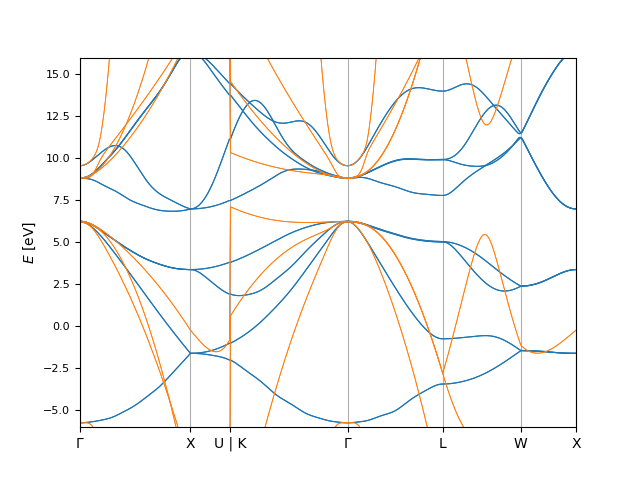

In [23]:
%matplotlib notebook
fig = bi.plot.eigenvals(eigenvals)
ax = fig.gca()
bi.plot.eigenvals(eigenvals_kp, ax=ax, plot_options=dict(color='C1', lw=0.6))
ax.set_ylim((-6, 16));